In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from sklearn import model_selection
from math import sqrt


In [12]:
energy = pd.read_csv("C://Users//E7270//Desktop//Hamoye/energydata_complete.csv")

In [13]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [16]:
energy.drop(['date'], axis = 1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [17]:
simple_linear_reg_df = energy[['T2', 'T6']].sample(15, random_state=2)

In [18]:
energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [27]:
T2 = x
T6 = y
rss = np.sum(np.square(y - x))
round(rss, 3) 

3453843.036

In [26]:
energy.drop(['lights','date'], axis = 1)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


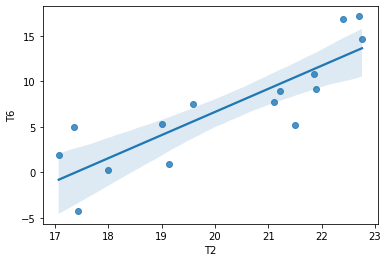

In [28]:
import seaborn as sns
import matplotlib as plt
sns.regplot(x="T2", y="T6",
            data=simple_linear_reg_df)

In [29]:
# independent variables
X = energy.drop(["Appliances"], axis=1)
# dependent variable
y = energy[["Appliances"]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [32]:
X_train.drop(['lights','date'], axis = 1)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,21.500000,35.626667,17.790000,40.590000,21.700000,35.26,20.39,33.863333,19.600000,40.425,...,19.463333,38.260000,0.250000,766.400000,83.000000,2.000000,65.000000,-2.350000,36.226675,36.226675
2453,19.500000,44.560000,18.700000,44.290000,19.823333,44.50,18.10,43.860000,17.200000,52.000,...,17.200000,46.163333,3.166667,765.266667,85.333333,2.000000,40.000000,0.966667,43.199767,43.199767
9152,20.790000,35.400000,16.890000,42.030000,21.700000,36.00,19.70,33.200000,19.290000,39.900,...,19.390000,39.067500,-1.566667,766.000000,89.333333,1.333333,60.666667,-3.100000,24.976055,24.976055
12694,22.100000,43.260000,19.963333,45.500000,23.390000,39.79,21.10,39.060000,20.660000,58.054,...,20.290000,37.400000,8.833333,753.366667,81.000000,1.666667,26.000000,5.733333,16.161125,16.161125
16952,24.700000,42.360000,29.856667,31.790000,26.171429,38.59,25.10,39.760000,23.166667,60.130,...,23.100000,44.466667,21.433333,752.100000,51.000000,2.000000,40.000000,10.800000,17.055346,17.055346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,21.760000,40.900000,19.390000,43.090000,23.000000,39.00,21.50,39.790000,20.100000,46.500,...,20.356667,40.560000,9.566667,750.466667,77.666667,6.666667,40.000000,5.833333,45.513197,45.513197
11964,22.390000,43.700000,22.000000,42.066667,22.700000,41.23,21.29,44.120000,19.700000,48.790,...,20.290000,44.290000,17.300000,749.500000,66.000000,2.000000,40.000000,10.900000,34.934752,34.934752
5390,20.290000,35.700000,18.200000,37.590000,20.100000,37.59,18.20,35.290000,18.500000,40.572,...,17.890000,39.466667,-1.066667,754.900000,87.000000,3.666667,62.666667,-2.933333,19.071358,19.071358
860,21.790000,35.560000,20.434000,35.116000,21.200000,36.90,21.10,35.663333,18.050000,46.145,...,18.500000,41.466667,2.066667,765.033333,64.333333,1.333333,40.000000,-4.066667,1.050592,1.050592


In [33]:
energy = energy.drop(columns="lights")

In [45]:
#X_train = X_train.drop(columns="date")
X_test = X_test.drop(columns="lights")
X_test

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
8980,20.890000,35.400000,17.760000,39.163333,20.290000,36.900000,19.760000,34.200000,18.600000,51.290000,...,19.290000,39.030000,1.766667,768.900000,88.333333,2.333333,63.000000,0.000000,25.622221,25.622221
2754,21.890000,53.100000,21.290000,45.360000,21.633333,49.226667,20.533333,40.966667,17.677778,58.204444,...,16.290000,44.200000,2.700000,754.600000,90.000000,3.000000,27.000000,1.200000,23.474485,23.474485
9132,21.390000,35.500000,17.633333,40.530000,21.666667,35.200000,20.290000,33.760000,19.600000,40.290000,...,19.390000,38.290000,0.200000,766.200000,83.000000,2.000000,65.000000,-2.400000,0.143368,0.143368
14359,21.390000,41.033333,23.890000,34.840000,22.033333,36.933333,22.390000,35.236000,19.633333,43.266667,...,20.290000,38.560000,8.850000,767.800000,70.833333,5.166667,40.000000,3.716667,10.293451,10.293451
8875,19.963333,35.126667,16.463333,40.126667,20.000000,36.400000,19.260000,34.966667,17.890000,49.000000,...,19.000000,40.700000,-0.466667,769.650000,93.333333,4.000000,48.833333,-1.450000,10.754162,10.754162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,22.100000,37.933333,21.196667,35.133333,21.856667,41.100000,21.856667,39.100000,18.100000,50.066667,...,17.890000,41.433333,1.850000,765.500000,81.500000,1.500000,29.000000,-1.050000,45.503046,45.503046
10993,21.700000,38.290000,19.200000,41.560000,23.000000,38.326667,20.260000,39.260000,20.000000,47.400000,...,20.290000,41.933333,8.666667,747.450000,73.500000,8.166667,40.000000,4.150000,48.773300,48.773300
11761,20.926667,39.400000,18.700000,43.000000,21.790000,37.400000,19.790000,38.290000,19.290000,45.163333,...,19.600000,37.790000,7.200000,757.916667,84.500000,1.166667,64.000000,4.783333,39.633513,39.633513
12364,22.000000,41.230000,20.700000,41.900000,23.000000,38.790000,21.500000,40.656667,20.600000,45.626667,...,20.856667,39.260000,10.366667,752.766667,69.333333,9.000000,40.000000,4.900000,30.415321,30.415321


In [39]:
print(X_train.head())

          T1       RH_1         T2   RH_2         T3   RH_3     T4       RH_4  \
9129   21.50  35.626667  17.790000  40.59  21.700000  35.26  20.39  33.863333   
2453   19.50  44.560000  18.700000  44.29  19.823333  44.50  18.10  43.860000   
9152   20.79  35.400000  16.890000  42.03  21.700000  36.00  19.70  33.200000   
12694  22.10  43.260000  19.963333  45.50  23.390000  39.79  21.10  39.060000   
16952  24.70  42.360000  29.856667  31.79  26.171429  38.59  25.10  39.760000   

              T5    RH_5  ...         T9       RH_9      T_out  Press_mm_hg  \
9129   19.600000  40.425  ...  19.463333  38.260000   0.250000   766.400000   
2453   17.200000  52.000  ...  17.200000  46.163333   3.166667   765.266667   
9152   19.290000  39.900  ...  19.390000  39.067500  -1.566667   766.000000   
12694  20.660000  58.054  ...  20.290000  37.400000   8.833333   753.366667   
16952  23.166667  60.130  ...  23.100000  44.466667  21.433333   752.100000   

          RH_out  Windspeed  Visibilit

In [46]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

53.643

In [47]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

Appliances    5.191850e+07
dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

93.64

In [49]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [10]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [52]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
olsmodel_final = sm.OLS(y_train, X_train).fit()
print(olsmodel_final.summary())

In [ ]:
from sklearn.linear_model import Ridge

def get_weights_df(model, feat, col_name): 
    #this function returns the weight of every feature 
    weights = pd.Series(model.coef_, feat.columns).sort_values() 
    weights_df = pd.DataFrame(weights).reset_index() 
    weights_df.columns = ['Features', col_name] 
    weights_df[col_name].round(3) 
    return weights_df


In [54]:
from sklearn.linear_model import Ridge
#ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight') 
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

NameError: name 'get_weights_df' is not defined

In [55]:
#linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight') 
#ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight') 
#lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight') 

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features') 
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

NameError: name 'linear_model_weights' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_test, predicted_values)) 
round(rmse, 3)

In [ ]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

In [50]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

95.21565985217909


TypeError: 'numpy.float64' object is not callable

In [53]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

95.21569972708544


TypeError: 'numpy.float64' object is not callable